## Notebook import

In [18]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


## Gather data

In [14]:
boston_dataset = load_boston()



['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

## Data exploration with pandas datafram

In [15]:
#creating a pandas dataframe
data = pd.DataFrame(data= boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICES'] = boston_dataset.target
data.tail()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## cleaning data- checking for missing values


In [6]:
 #data.info()

## visualizing data- histogram distribution and bar chart

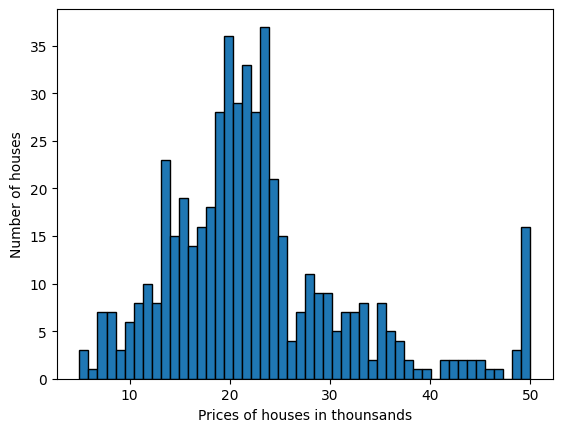

In [7]:

plt.hist(data['PRICES'], bins=50, ec='black')
plt.xlabel('Prices of houses in thounsands')
plt.ylabel('Number of houses')
plt.show()

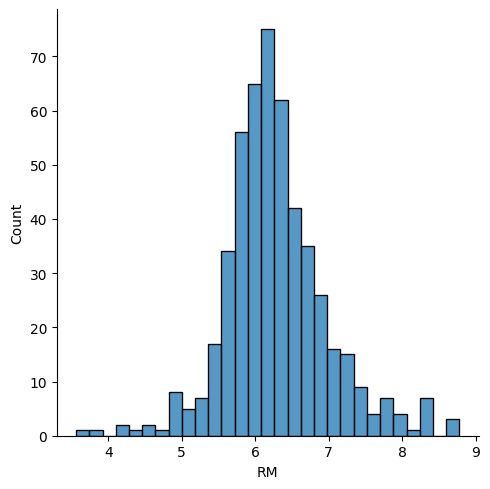

In [8]:
sns.displot(data['RM'], )
plt.show()

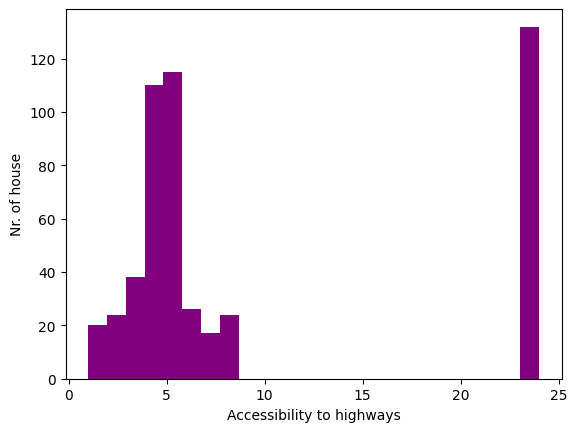

In [9]:

plt.hist(data['RAD'],bins=24, color='purple')
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of house')
plt.show()

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')


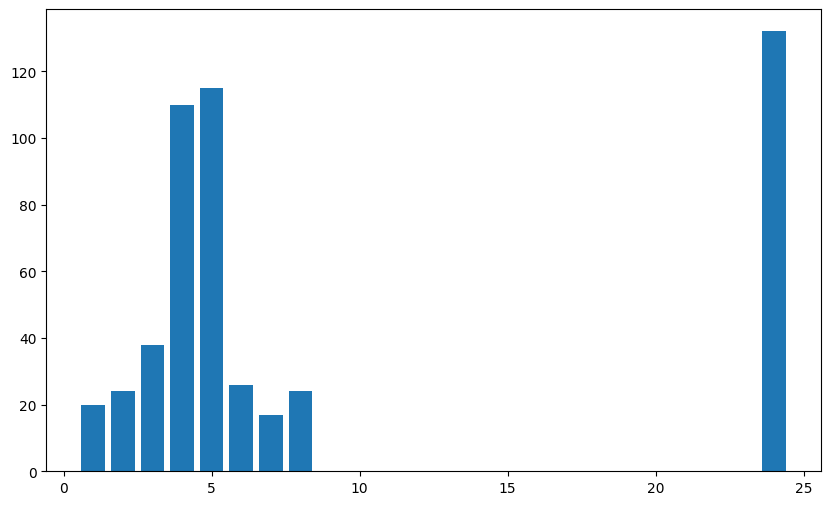

In [10]:
## creating a bar chart
plt.figure(figsize=(10,6))
frequency = data['RAD'].value_counts()
print(frequency.index) 
plt.bar(frequency.index,frequency)
plt.show()


In [11]:
print(data['CHAS'].value_counts())

0.0    471
1.0     35
Name: CHAS, dtype: int64


## Correlation
### $$ \rho _{XY} =CORR(X,Y) $$
### $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$ 

In [16]:
data['PRICES'].corr(data['PTRATIO'])

-0.5077866855375618

In [23]:
 #visualizing correlations with heat map
 #creatin an array of 0 like another

mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

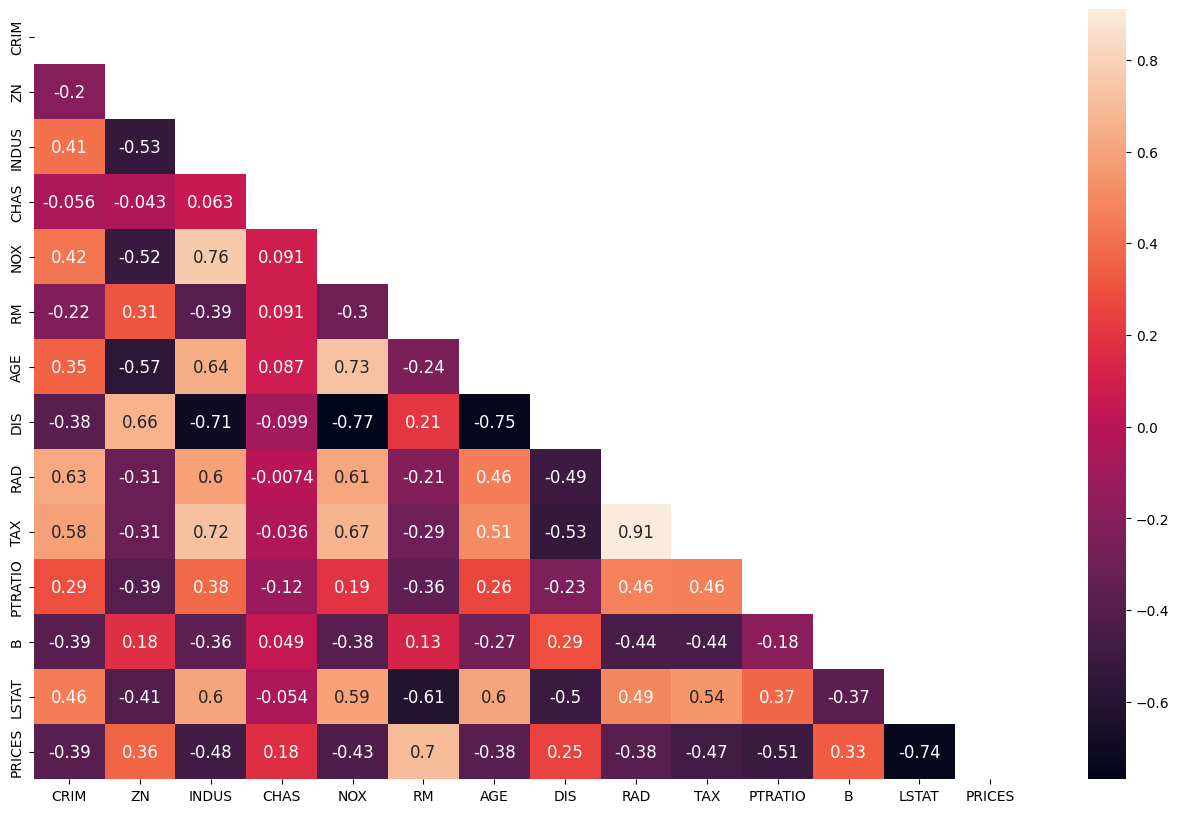

In [31]:
#creating heat map
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={'size':12})
plt.show()

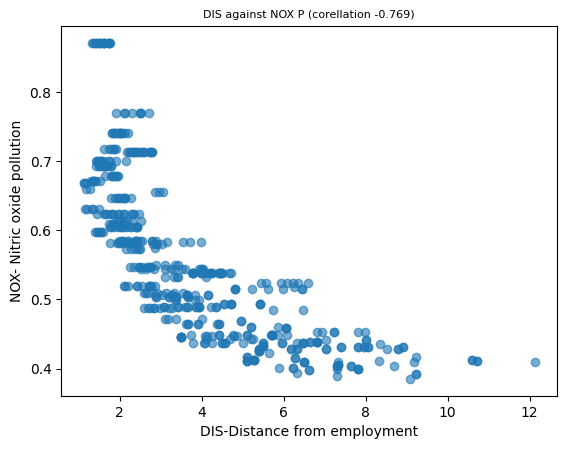

In [42]:
dis_noxcorr= round(data['DIS'].corr(data['NOX']), 3)
plt.scatter(data['DIS'], data['NOX'],alpha= 0.6)
plt.xlabel('DIS-Distance from employment')
plt.title(f'DIS against NOX P (corellation {dis_noxcorr})',fontsize = 8)
plt.ylabel('NOX- Nitric oxide pollution')
plt.show()

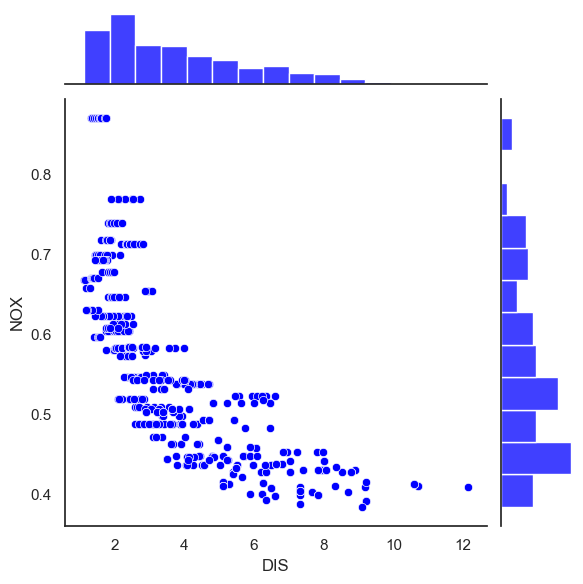

In [51]:
# using seaborn module
sns.set()
sns.set_style('white')

sns.jointplot(x=data['DIS'], y=data['NOX'], color='blue')
plt.show()